#                                                     Churn Prediction
Churn is a one of the biggest problem in the SME.In recent years, post-liberalization of the energy market in Europe, ElectricCo has had a growing problem with increasing customer defections above industry average. They would like to identify the drivers of this problem and to devise and implement a strategy to counter it. The churn issue is most acute in the SME division and thus they want it to be the first priority. The head of the SME division has asked whether it is possible to predict the customers which are most likely to churn so that they can trial a range of pre-emptive actions.

The first stage is to establish the viability of such a model. For training your model you are provided with a dataset which includes features of SME customers in January 2016 as well as the information about whether or not they have churned by March 2016. In addition to that you have received the prices from 2015 for these customers. While it is not mandatory, but you are encouraged to test multiple algorithms to build predictive model.

Using the trained model you shall “score” customers in the verification data set (provided in the eponymous file) and put them in descending order of the propensity to churn. You should also classify these customers into two classes: those which you predict to churn are to be labelled "1" and the remaining customers should be labelled "0" in the result template.

#                                        Information contained in the data set

The below table describes all the data fields which are found in the data (across three files). You will notice that the contents of some fields are meaningless text strings. This is due to "hashing" of text fields for data privacy. While their commercial interpretation is lost as a result of the hashing, they may still have predictive power.

A whole host of rich investigations are possible. Your ideas on what some next steps could be, armed with such data is also of interest.

#                                                Data fields and their description


Field name	Description	Present
id	contact id	
activity_new	category of the company's activity	6551
campaign_disc_ele	code of the electricity campaign the customer last subscribed to (none)	
channel_sales	code of the sales channel	11878
cons_12m	electricity consumption of the past 12 months	
cons_gas_12m	gas consumption of the past 12 months	
cons_last_month	electricity consumption of the last month	
date_activ	date of activation of the contract	
date_end	registered date of the end of the contract	
date_first_activ	date of first contract of the client	3508
date_modif_prod	date of last modification of the product	
date_renewal	date of the next contract renewal	
forecast_base_bill_ele	forecasted electricity bill baseline for next month	3508
forecast_base_bill_year	forecasted electricity bill baseline for calendar year	3508
forecast_bill_12m	forecasted electricity bill baseline for 12 months	3508
forecast_cons_12m	forecasted electricity consumption for next 12 months	
forecast_cons_year	forecasted electricity consumption for next calendar year	
forecast_discount_energy	forecasted value of current discount	
forecast_meter_rent_12m	forecasted bill of meter rental for the next 12 months	
forecast_price_energy_p1	forecasted energy price for 1st period	
forecast_price_energy_p2	forecasted energy price for 2nd period	
forecast_price_pow_p1	forecasted power price for 1st period	
has_gas	indicated if client is also a gas client	
imp_cons	current paid consumption	
margin_gross_pow_ele	gross margin on power subscription	
margin_net_pow_ele	net margin on power subscription	
nb_prod_act	number of active products and services	
net_margin	total net margin	
num_years_antig	antiquity of the client (in number of years)	
origin_up	code of the electricity campaign the customer first subscribed to	
pow_max	subscribed power	
price_date	reference date

## Data Source
We are going to use the SME churn Data that we looked at zip folder and here to try and predict which loans will default.

# Import Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import plotly.graph_objs as go
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer,auc
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold

C:\Users\kanan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



# Import DataSet

In [3]:
df = pd.read_csv('Hackthon_case_training_data.csv')
dt = pd.read_csv('Hackthon_case_training_output.csv')
sm = pd.read_csv('sample_ouput.csv')

# Pre-process Data & Visualization
This section is was created in here.

In [4]:
df.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,11/7/2012,11/6/2016,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,8/21/2009,8/30/2016,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4/16/2010,4/16/2016,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,3/30/2010,3/30/2016,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [5]:
df.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


In [6]:
df.index

RangeIndex(start=0, stop=16096, step=1)

In [7]:
df.corr()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
campaign_disc_ele,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cons_12m,NaN,1.000000,0.471233,0.919545,0.132991,0.132991,0.149023,0.133147,0.165168,0.139526,...,-0.033546,0.146758,-0.025418,0.139353,-0.065500,-0.045779,0.308567,0.120491,0.008810,0.102423
cons_gas_12m,NaN,0.471233,1.000000,0.447209,0.085733,0.085733,0.083604,0.076854,0.059525,0.057619,...,-0.022416,0.078456,-0.027193,0.060609,-0.016867,-0.008242,0.272005,0.058930,-0.008626,0.052365
cons_last_month,NaN,0.919545,0.447209,1.000000,0.136207,0.136207,0.134066,0.136816,0.129574,0.151476,...,-0.024242,0.123164,-0.020057,0.153861,-0.054114,-0.037696,0.350711,0.096424,0.004860,0.089565
forecast_base_bill_ele,NaN,0.132991,0.085733,0.136207,1.000000,1.000000,0.794776,0.964402,0.750961,0.958303,...,-0.223693,0.351376,0.106436,0.964402,-0.088898,-0.054790,0.051419,0.468836,0.021869,0.585426
forecast_base_bill_year,NaN,0.132991,0.085733,0.136207,1.000000,1.000000,0.794776,0.964402,0.750961,0.958303,...,-0.223693,0.351376,0.106436,0.964402,-0.088898,-0.054790,0.051419,0.468836,0.021869,0.585426
forecast_bill_12m,NaN,0.149023,0.083604,0.134066,0.794776,0.794776,1.000000,0.751430,0.970487,0.797272,...,-0.258372,0.376494,0.147365,0.751430,-0.129388,-0.086826,0.050683,0.656937,0.029917,0.711502
forecast_cons,NaN,0.133147,0.076854,0.136816,0.964402,0.964402,0.751430,1.000000,0.758825,0.974419,...,-0.166692,0.290593,0.074713,1.000000,-0.111186,-0.075863,0.055135,0.489346,0.006925,0.457566
forecast_cons_12m,NaN,0.165168,0.059525,0.129574,0.750961,0.750961,0.970487,0.758825,1.000000,0.746076,...,-0.217315,0.245845,0.058169,0.725550,-0.184179,-0.141642,0.013283,0.768871,0.064431,0.583119
forecast_cons_year,NaN,0.139526,0.057619,0.151476,0.958303,0.958303,0.797272,0.974419,0.746076,1.000000,...,-0.206041,0.225691,0.053678,0.981732,-0.139177,-0.106576,0.013811,0.537701,0.066105,0.442228


In [8]:
df.columns

Index(['id', 'activity_new', 'campaign_disc_ele', 'channel_sales', 'cons_12m',
       'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_first_activ', 'date_modif_prod', 'date_renewal',
       'forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max'],
      dtype='object')

In [9]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nMissing  :  ", df.isnull().sum().values)
print ("\nUnique values :  \n",df.nunique())

Rows     :  16096
Columns  :  32

Features : 
 ['id', 'activity_new', 'campaign_disc_ele', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_first_activ', 'date_modif_prod', 'date_renewal', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'origin_up', 'pow_max']

Missing values :   93633

Missing  :   [    0  9545 16096  4218     0     0     0     0     2 12588   157    40
 12588 12588 12588 12588     0     0   126     0   126   126   126     0
     0    13    13     0    15     0    87     3]

Unique values :  
 id                          16096
activity_new                  419
campaign_disc_ele            

### Heatmap for finding missing values

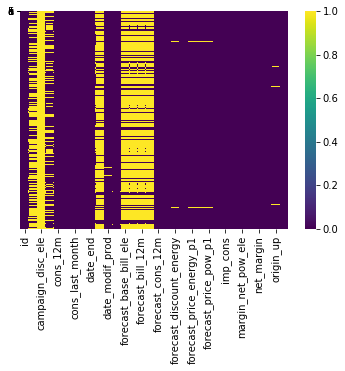

In [10]:
sns.heatmap(df.isnull(), cmap='viridis', yticklabels='False')

In [11]:
df = df.drop(['activity_new', 'campaign_disc_ele', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'date_first_activ', 'channel_sales'], axis=1)

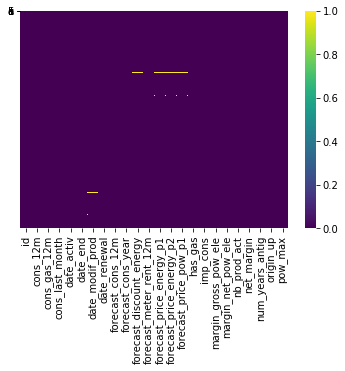

In [12]:
sns.heatmap(df.isnull(), cmap='viridis', yticklabels='False')

In [13]:
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing  :  ", df.isnull().sum().values)
print ("\nUnique values :  \n",df.nunique())


Features : 
 ['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'origin_up', 'pow_max']

Missing  :   [  0   0   0   0   0   2 157  40   0   0 126   0 126 126 126   0   0  13
  13   0  15   0  87   3]

Unique values :  
 id                          16096
cons_12m                    12002
cons_gas_12m                 2290
cons_last_month              5308
date_activ                   1961
date_end                      371
date_modif_prod              2307
date_renewal                  398
forecast_cons_12m           15422
forecast_cons_year           4895
forecast_discount_energy       14
forecast_meter_rent_12m      3938
forecast_p

In [14]:
df.shape

(16096, 24)

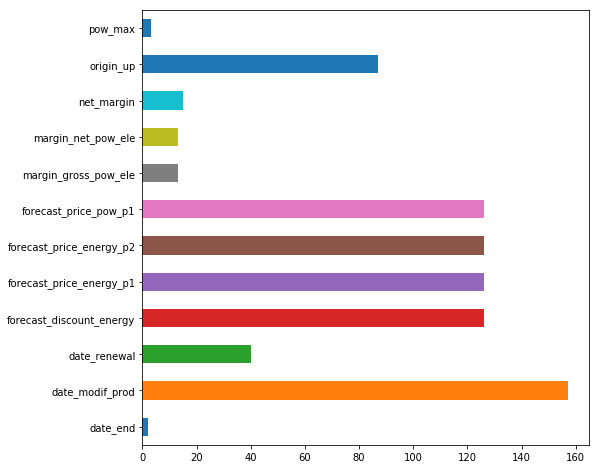

In [15]:
# Here I plot missing values:
data_null = df.isna().sum()
plt.figure(figsize=(8,8))
data_null[data_null!=0].plot(kind='barh');

In [16]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,11/7/2012,11/6/2016,11/7/2012,11/9/2015,26520.30,10025,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,6/15/2013,6/15/2016,NaN,6/23/2015,0.00,0,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,8/21/2009,8/30/2016,8/21/2009,8/31/2015,189.95,0,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,4/16/2010,4/16/2016,4/16/2010,4/17/2015,47.96,0,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,1584,0,0,3/30/2010,3/30/2016,3/30/2010,3/31/2015,240.04,0,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [17]:
df['date_activ'] = pd.to_datetime(df['date_activ'])
df['date_activ_year'] = df.date_activ.dt.year
df['date_activ_month'] = df.date_activ.dt.month
df['date_activ_day'] = df.date_activ.dt.day
df=df.drop(columns='date_activ',axis=1)

In [18]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,date_activ_year,date_activ_month,date_activ_day
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,11/6/2016,11/7/2012,11/9/2015,26520.30,10025,0.0,...,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,2012,11,7
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,6/15/2016,NaN,6/23/2015,0.00,0,0.0,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,2013,6,15
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,8/30/2016,8/21/2009,8/31/2015,189.95,0,0.0,...,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,2009,8,21
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,4/16/2016,4/16/2010,4/17/2015,47.96,0,0.0,...,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,2010,4,16
4,bba03439a292a1e166f80264c16191cb,1584,0,0,3/30/2016,3/30/2010,3/31/2015,240.04,0,0.0,...,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,2010,3,30


In [19]:
df['date_end'] = pd.to_datetime(df['date_end'])
df['date_end_year'] = df.date_end.dt.year
df['date_end_month'] = df.date_end.dt.month
df['date_end_day'] = df.date_end.dt.day
df=df.drop(columns='date_end',axis=1)

In [20]:
df['date_renewal'] = pd.to_datetime(df['date_renewal'])
df['date_renewal_year'] = df.date_renewal.dt.year
df['date_renewal_month'] = df.date_renewal.dt.month
df['date_renewal_day'] = df.date_renewal.dt.day
df=df.drop(columns='date_renewal',axis=1)

In [21]:
df['date_modif_prod'] = pd.to_datetime(df['date_modif_prod'])
df['date_modif_prod_year'] = df.date_modif_prod.dt.year
df['date_modif_prod_month'] = df.date_modif_prod.dt.month
df['date_modif_prod_day'] = df.date_modif_prod.dt.day
df=df.drop(columns='date_modif_prod',axis=1)

In [22]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,...,date_activ_day,date_end_year,date_end_month,date_end_day,date_renewal_year,date_renewal_month,date_renewal_day,date_modif_prod_year,date_modif_prod_month,date_modif_prod_day
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,26520.30,10025,0.0,359.29,0.095919,0.088347,...,7,2016.0,11.0,6.0,2015.0,11.0,9.0,2012.0,11.0,7.0
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,15,2016.0,6.0,15.0,2015.0,6.0,23.0,NaN,NaN,NaN
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,21,2016.0,8.0,30.0,2015.0,8.0,31.0,2009.0,8.0,21.0
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,16,2016.0,4.0,16.0,2015.0,4.0,17.0,2010.0,4.0,16.0
4,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,30,2016.0,3.0,30.0,2015.0,3.0,31.0,2010.0,3.0,30.0


In [23]:
mean = df['forecast_price_pow_p1'].mean()
mean1 = df['forecast_price_energy_p2'].mean()
mean2 = df['forecast_price_energy_p1'].mean()
mean3 = df['forecast_discount_energy'].mean()
df['forecast_price_pow_p1'] = df['forecast_price_pow_p1'].fillna(mean)
df['forecast_price_energy_p2'] = df['forecast_price_energy_p2'].fillna(mean1)
df['forecast_price_energy_p1'] = df['forecast_price_energy_p1'].fillna(mean2)
df['forecast_discount_energy'] = df['forecast_discount_energy'].fillna(mean3)

In [24]:
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing  :  ", df.isnull().sum().values)
print ("\nUnique values :  \n",df.nunique())


Features : 
 ['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'date_activ_year', 'date_activ_month', 'date_activ_day', 'date_end_year', 'date_end_month', 'date_end_day', 'date_renewal_year', 'date_renewal_month', 'date_renewal_day', 'date_modif_prod_year', 'date_modif_prod_month', 'date_modif_prod_day']

Missing  :   [  0   0   0   0   0   0   0   0   0   0   0   0   0  13  13   0  15   0
  87   3   0   0   0   2   2   2  40  40  40 157 157 157]

Unique values :  
 id                          16096
cons_12m                    12002
cons_gas_12m                 2290
cons_last_month              5308
forecast_cons_12m           15422
forecast_cons_year           4895


In [25]:
m = int(df['date_modif_prod_year'].mean())
m1 = int(df['date_modif_prod_month'].mean())
m2 = int(df['date_modif_prod_day'].mean())
df['date_modif_prod_year'] = df['date_modif_prod_year'].fillna(m)
df['date_modif_prod_month'] = df['date_modif_prod_month'].fillna(m1)
df['date_modif_prod_day'] = df['date_modif_prod_day'].fillna(m2)

In [26]:
print ("\nMissing  :  ", df.isnull().sum().values)


Missing  :   [ 0  0  0  0  0  0  0  0  0  0  0  0  0 13 13  0 15  0 87  3  0  0  0  2
  2  2 40 40 40  0  0  0]


In [27]:
l = int(df['date_renewal_year'].mean())
l1 = int(df['date_renewal_month'].mean())
l2 = int(df['date_renewal_day'].mean())
df['date_renewal_year'] = df['date_renewal_year'].fillna(l)
df['date_renewal_month'] = df['date_renewal_month'].fillna(l1)
df['date_renewal_day'] = df['date_renewal_day'].fillna(l2)

In [28]:
print ("\nMissing  :  ", df.isnull().sum().values)


Missing  :   [ 0  0  0  0  0  0  0  0  0  0  0  0  0 13 13  0 15  0 87  3  0  0  0  2
  2  2  0  0  0  0  0  0]


In [29]:
l = int(df['date_renewal_year'].mean())
l1 = int(df['date_renewal_month'].mean())
l2 = int(df['date_renewal_day'].mean())
df['date_renewal_year'] = df['date_renewal_year'].fillna(l)
df['date_renewal_month'] = df['date_renewal_month'].fillna(l1)
df['date_renewal_day'] = df['date_renewal_day'].fillna(l2)

In [30]:
e = int(df['date_end_year'].mean())
e1 = int(df['date_end_month'].mean())
e2 = int(df['date_end_day'].mean())
df['date_end_year'] = df['date_end_year'].fillna(e)
df['date_end_month'] = df['date_end_month'].fillna(e1)
df['date_end_day'] = df['date_end_day'].fillna(e2)

In [31]:
print ("\nMissing  :  ", df.isnull().sum().values)


Missing  :   [ 0  0  0  0  0  0  0  0  0  0  0  0  0 13 13  0 15  0 87  3  0  0  0  0
  0  0  0  0  0  0  0  0]


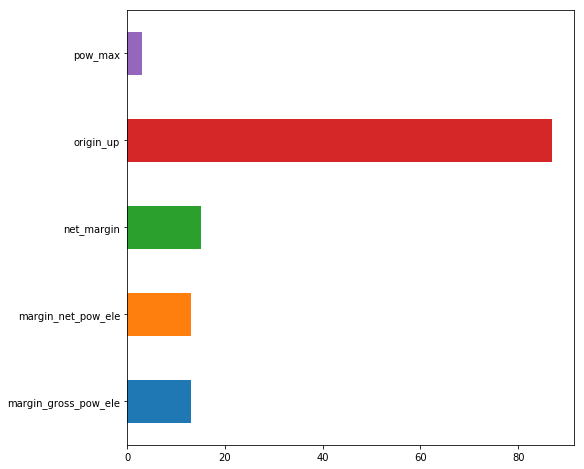

In [32]:
# Here I plot missing values:
data_null = df.isna().sum()
plt.figure(figsize=(8,8))
data_null[data_null!=0].plot(kind='barh');

In [33]:
p = int(df['pow_max'].mean())
df['pow_max'] = df['pow_max'].fillna(p)
margin = int(df['net_margin'].mean())
df['net_margin'] = df['net_margin'].fillna(margin)
mn = int(df['margin_net_pow_ele'].mean())
df['margin_net_pow_ele'] = df['margin_net_pow_ele'].fillna(mn)
mg = int(df['margin_gross_pow_ele'].mean())
df['margin_gross_pow_ele'] = df['margin_gross_pow_ele'].fillna(mg)

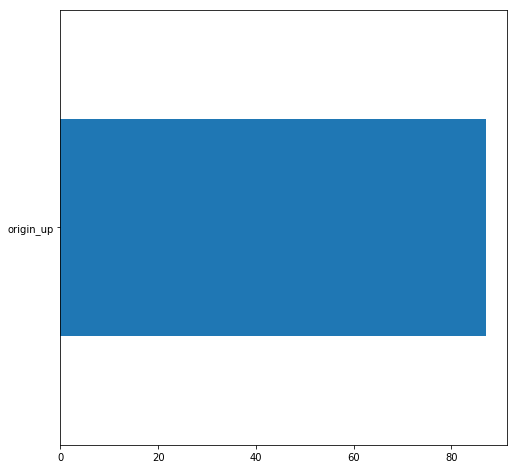

In [34]:
# Here I plot missing values:
data_null = df.isna().sum()
plt.figure(figsize=(8,8))
data_null[data_null!=0].plot(kind='barh');

In [35]:
#replace values
df['has_gas'] = df['has_gas'].replace({"f":0,"t":1})

In [36]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,...,date_activ_day,date_end_year,date_end_month,date_end_day,date_renewal_year,date_renewal_month,date_renewal_day,date_modif_prod_year,date_modif_prod_month,date_modif_prod_day
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,26520.30,10025,0.0,359.29,0.095919,0.088347,...,7,2016.0,11.0,6.0,2015.0,11.0,9.0,2012.0,11.0,7.0
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,15,2016.0,6.0,15.0,2015.0,6.0,23.0,2012.0,7.0,15.0
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,21,2016.0,8.0,30.0,2015.0,8.0,31.0,2009.0,8.0,21.0
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,16,2016.0,4.0,16.0,2015.0,4.0,17.0,2010.0,4.0,16.0
4,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,30,2016.0,3.0,30.0,2015.0,3.0,31.0,2010.0,3.0,30.0


### One hot encoding

In [37]:
#df['origin_up'] = df['origin_up'].replace({"ewxeelcelemmiwuafmddpobolfuxioce":0,
#                                          "kamkkxfxxuwbdslkwifmmcsiusiuosws":1,
#                                          "ldkssxwpmemidmecebumciepifcamkci":2,
#                                          "lxidpiddsbxsbosboudacockeimpuepw":3,
#                                         "usapbepcfoloekilkwsdiboslwaxobdp":4})
df['origin_up'] = pd.get_dummies(df['origin_up'],drop_first=True)

In [38]:
df = df.drop(['origin_up'], axis=1)

In [39]:
#o = int(df['origin_up'].mean())
#df['origin_up'] = df['origin_up'].fillna(o)

In [40]:
print ("\nMissing  :  ", df.isnull().sum().values)


Missing  :   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [41]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,...,date_activ_day,date_end_year,date_end_month,date_end_day,date_renewal_year,date_renewal_month,date_renewal_day,date_modif_prod_year,date_modif_prod_month,date_modif_prod_day
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,26520.30,10025,0.0,359.29,0.095919,0.088347,...,7,2016.0,11.0,6.0,2015.0,11.0,9.0,2012.0,11.0,7.0
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,15,2016.0,6.0,15.0,2015.0,6.0,23.0,2012.0,7.0,15.0
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,21,2016.0,8.0,30.0,2015.0,8.0,31.0,2009.0,8.0,21.0
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,16,2016.0,4.0,16.0,2015.0,4.0,17.0,2010.0,4.0,16.0
4,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,30,2016.0,3.0,30.0,2015.0,3.0,31.0,2010.0,3.0,30.0


In [42]:
num_cols = df.nunique()[df.nunique()>=5].keys().tolist()
num_cols = num_cols[1:]
print("Total number of num_cols: "+ str(len(num_cols)) + "\n" + str(num_cols))

Total number of num_cols: 27
['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max', 'date_activ_year', 'date_activ_month', 'date_activ_day', 'date_end_month', 'date_end_day', 'date_renewal_month', 'date_renewal_day', 'date_modif_prod_year', 'date_modif_prod_month', 'date_modif_prod_day']


### Here we sort the trainin data and traing output then we take the label from training output and then combine with the traing data 

In [43]:
#df = df.sort_values(['id'])
dt = dt.sort_values(['id'])

In [44]:
dt = dt.reset_index(drop=True)

In [45]:
d = pd.DataFrame(columns=['id', 'churn'])
d['id'] = pd.concat([dt['id'], sm['id']], ignore_index=True )
d['churn'] = pd.concat([dt['churn'], sm['churn']], ignore_index=True )

In [46]:
d.tail(10)

,id,churn
16086,d10f449cc0f82d572309f2b1d955d9e5,NaN
16087,9d062df9b47c3befc1213c18fd2e4e4d,NaN
16088,087582129b59aaf28fcd19695e59d98f,NaN
16089,cdcfb46db2018af08ac79e9bc3f70c2b,NaN
16090,b564d9a1770b764cb35b3c98ea909aee,NaN
16091,f936975a849901448b282671cd2c3022,NaN
16092,c703d86615fc53e0fc78d2da8da9b5d1,NaN
16093,b9af50f0ec85c23b7c026e14dcc5bb2c,NaN
16094,32302714336600b283cb69b16e65a481,NaN
16095,27c730b7f5ff02371f916e2268f85682,NaN


In [47]:
sm.tail(10)

,id,Probability,churn
586,d10f449cc0f82d572309f2b1d955d9e5,NaN,NaN
587,9d062df9b47c3befc1213c18fd2e4e4d,NaN,NaN
588,087582129b59aaf28fcd19695e59d98f,NaN,NaN
589,cdcfb46db2018af08ac79e9bc3f70c2b,NaN,NaN
590,b564d9a1770b764cb35b3c98ea909aee,NaN,NaN
591,f936975a849901448b282671cd2c3022,NaN,NaN
592,c703d86615fc53e0fc78d2da8da9b5d1,NaN,NaN
593,b9af50f0ec85c23b7c026e14dcc5bb2c,NaN,NaN
594,32302714336600b283cb69b16e65a481,NaN,NaN
595,27c730b7f5ff02371f916e2268f85682,NaN,NaN


In [48]:
print(d.shape)
print(d.isnull().sum().values)
d = d.sort_values('id')
d = d.reset_index(drop=True)

(16096, 2)
[  0 596]


In [49]:
d.head(10)

,id,churn
0,0002203ffbb812588b632b9e628cc38d,0.0
1,0004351ebdd665e6ee664792efc4fd13,NaN
2,0010bcc39e42b3c2131ed2ce55246e3c,0.0
3,0010ee3855fdea87602a5b7aba8e42de,0.0
4,00114d74e963e47177db89bc70108537,0.0
5,00126c87cf78d7604278f0a9adeb689e,0.0
6,0013f326a839a2f6ad87a1859952d227,NaN
7,00184e957277eeef733a7b563fdabd06,0.0
8,001987ed9dbdab4efa274a9c7233e1f4,0.0
9,0019baf3ed1242cd99b3cb592030446f,1.0


In [50]:
df = df.sort_values(['id'])

In [51]:
df = df.reset_index(drop=True)

In [52]:
df.head(10)

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,...,date_activ_day,date_end_year,date_end_month,date_end_day,date_renewal_year,date_renewal_month,date_renewal_day,date_modif_prod_year,date_modif_prod_month,date_modif_prod_day
0,0002203ffbb812588b632b9e628cc38d,22034,0,3084,729.06,425,0.0,138.95,0.116900,0.100015,...,19,2016.0,2.0,21.0,2015.0,2.0,25.0,2010.0,1.0,19.0
1,0004351ebdd665e6ee664792efc4fd13,4060,0,0,597.77,0,0.0,6.84,0.142065,0.000000,...,6,2016.0,6.0,21.0,2015.0,6.0,23.0,2013.0,6.0,21.0
2,0010bcc39e42b3c2131ed2ce55246e3c,7440,0,1062,1311.16,1062,30.0,18.37,0.199230,0.000000,...,25,2016.0,5.0,5.0,2015.0,2.0,26.0,2015.0,5.0,5.0
3,0010ee3855fdea87602a5b7aba8e42de,4199490,728810,456462,11776.27,17393,0.0,132.11,0.110083,0.093746,...,1,2016.0,6.0,1.0,2015.0,6.0,8.0,2010.0,6.0,1.0
4,00114d74e963e47177db89bc70108537,11272,0,0,1671.41,0,0.0,18.27,0.144149,0.000000,...,2,2016.0,3.0,2.0,2015.0,3.0,9.0,2010.0,3.0,2.0
5,00126c87cf78d7604278f0a9adeb689e,104657,0,6760,10378.44,6760,0.0,393.44,0.110083,0.093746,...,1,2016.0,5.0,1.0,2015.0,5.0,2.0,2012.0,5.0,1.0
6,0013f326a839a2f6ad87a1859952d227,267414,0,19394,3077.34,1760,0.0,144.86,0.118636,0.101750,...,22,2016.0,2.0,22.0,2015.0,2.0,26.0,2014.0,10.0,7.0
7,00184e957277eeef733a7b563fdabd06,16072,0,5501,2363.54,5501,0.0,19.57,0.143801,0.000000,...,4,2016.0,2.0,4.0,2015.0,2.0,5.0,2013.0,2.0,4.0
8,001987ed9dbdab4efa274a9c7233e1f4,72346,57630,7654,3406.39,3585,0.0,131.76,0.115174,0.098837,...,10,2016.0,6.0,10.0,2015.0,6.0,22.0,2004.0,6.0,10.0
9,0019baf3ed1242cd99b3cb592030446f,528,0,150,142.05,150,0.0,18.37,0.273963,0.000000,...,21,2017.0,1.0,21.0,2016.0,1.0,22.0,2013.0,1.0,21.0


In [53]:
df['churn'] = d['churn']

In [54]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,...,date_end_year,date_end_month,date_end_day,date_renewal_year,date_renewal_month,date_renewal_day,date_modif_prod_year,date_modif_prod_month,date_modif_prod_day,churn
0,0002203ffbb812588b632b9e628cc38d,22034,0,3084,729.06,425,0.0,138.95,0.116900,0.100015,...,2016.0,2.0,21.0,2015.0,2.0,25.0,2010.0,1.0,19.0,0.0
1,0004351ebdd665e6ee664792efc4fd13,4060,0,0,597.77,0,0.0,6.84,0.142065,0.000000,...,2016.0,6.0,21.0,2015.0,6.0,23.0,2013.0,6.0,21.0,NaN
2,0010bcc39e42b3c2131ed2ce55246e3c,7440,0,1062,1311.16,1062,30.0,18.37,0.199230,0.000000,...,2016.0,5.0,5.0,2015.0,2.0,26.0,2015.0,5.0,5.0,0.0
3,0010ee3855fdea87602a5b7aba8e42de,4199490,728810,456462,11776.27,17393,0.0,132.11,0.110083,0.093746,...,2016.0,6.0,1.0,2015.0,6.0,8.0,2010.0,6.0,1.0,0.0
4,00114d74e963e47177db89bc70108537,11272,0,0,1671.41,0,0.0,18.27,0.144149,0.000000,...,2016.0,3.0,2.0,2015.0,3.0,9.0,2010.0,3.0,2.0,0.0


In [55]:
df.columns.tolist()

['id',
 'cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_p1',
 'forecast_price_energy_p2',
 'forecast_price_pow_p1',
 'has_gas',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'num_years_antig',
 'pow_max',
 'date_activ_year',
 'date_activ_month',
 'date_activ_day',
 'date_end_year',
 'date_end_month',
 'date_end_day',
 'date_renewal_year',
 'date_renewal_month',
 'date_renewal_day',
 'date_modif_prod_year',
 'date_modif_prod_month',
 'date_modif_prod_day',
 'churn']

In [56]:
df1 = df
df2 = df

In [57]:
df1.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,...,date_end_year,date_end_month,date_end_day,date_renewal_year,date_renewal_month,date_renewal_day,date_modif_prod_year,date_modif_prod_month,date_modif_prod_day,churn
0,0002203ffbb812588b632b9e628cc38d,22034,0,3084,729.06,425,0.0,138.95,0.116900,0.100015,...,2016.0,2.0,21.0,2015.0,2.0,25.0,2010.0,1.0,19.0,0.0
1,0004351ebdd665e6ee664792efc4fd13,4060,0,0,597.77,0,0.0,6.84,0.142065,0.000000,...,2016.0,6.0,21.0,2015.0,6.0,23.0,2013.0,6.0,21.0,NaN
2,0010bcc39e42b3c2131ed2ce55246e3c,7440,0,1062,1311.16,1062,30.0,18.37,0.199230,0.000000,...,2016.0,5.0,5.0,2015.0,2.0,26.0,2015.0,5.0,5.0,0.0
3,0010ee3855fdea87602a5b7aba8e42de,4199490,728810,456462,11776.27,17393,0.0,132.11,0.110083,0.093746,...,2016.0,6.0,1.0,2015.0,6.0,8.0,2010.0,6.0,1.0,0.0
4,00114d74e963e47177db89bc70108537,11272,0,0,1671.41,0,0.0,18.27,0.144149,0.000000,...,2016.0,3.0,2.0,2015.0,3.0,9.0,2010.0,3.0,2.0,0.0


In [58]:
df1 = df1.dropna(subset=['churn'])

In [59]:
df1.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,...,date_end_year,date_end_month,date_end_day,date_renewal_year,date_renewal_month,date_renewal_day,date_modif_prod_year,date_modif_prod_month,date_modif_prod_day,churn
0,0002203ffbb812588b632b9e628cc38d,22034,0,3084,729.06,425,0.0,138.95,0.116900,0.100015,...,2016.0,2.0,21.0,2015.0,2.0,25.0,2010.0,1.0,19.0,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,7440,0,1062,1311.16,1062,30.0,18.37,0.199230,0.000000,...,2016.0,5.0,5.0,2015.0,2.0,26.0,2015.0,5.0,5.0,0.0
3,0010ee3855fdea87602a5b7aba8e42de,4199490,728810,456462,11776.27,17393,0.0,132.11,0.110083,0.093746,...,2016.0,6.0,1.0,2015.0,6.0,8.0,2010.0,6.0,1.0,0.0
4,00114d74e963e47177db89bc70108537,11272,0,0,1671.41,0,0.0,18.27,0.144149,0.000000,...,2016.0,3.0,2.0,2015.0,3.0,9.0,2010.0,3.0,2.0,0.0
5,00126c87cf78d7604278f0a9adeb689e,104657,0,6760,10378.44,6760,0.0,393.44,0.110083,0.093746,...,2016.0,5.0,1.0,2015.0,5.0,2.0,2012.0,5.0,1.0,0.0


In [60]:
count=0
c=0
for i in df1.churn:
    if(i==0):
        count+=1
    else:
        c+=1
print(count, c)

13957 1543


In [61]:
df1.shape

(15500, 32)

### Here, we take all row with Null value in churn column and It will taken for final prediction 

In [62]:
df2 = df2[df2["churn"].isnull()]

In [63]:
df2.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,...,date_end_year,date_end_month,date_end_day,date_renewal_year,date_renewal_month,date_renewal_day,date_modif_prod_year,date_modif_prod_month,date_modif_prod_day,churn
1,0004351ebdd665e6ee664792efc4fd13,4060,0,0,597.77,0,0.0,6.84,0.142065,0.000000,...,2016.0,6.0,21.0,2015.0,6.0,23.0,2013.0,6.0,21.0,NaN
6,0013f326a839a2f6ad87a1859952d227,267414,0,19394,3077.34,1760,0.0,144.86,0.118636,0.101750,...,2016.0,2.0,22.0,2015.0,2.0,26.0,2014.0,10.0,7.0,NaN
16,002dc7935f7b6f855aaa3d1bd242ab9a,6542,0,951,667.16,951,0.0,131.76,0.112860,0.096521,...,2016.0,6.0,14.0,2015.0,6.0,21.0,2014.0,5.0,14.0,NaN
21,003fb333060c256bff67d8d550bff1fa,10026,19143,817,994.53,817,0.0,131.01,0.115174,0.098837,...,2016.0,7.0,10.0,2015.0,7.0,12.0,2009.0,7.0,10.0,NaN
68,00ccb1f5828d8ed38e8be755e092eb9a,642,0,141,96.44,141,0.0,18.37,0.145711,0.000000,...,2016.0,4.0,27.0,2015.0,4.0,28.0,2012.0,4.0,27.0,NaN


In [64]:
df2 = df2.reset_index(drop=True)

In [65]:
df2.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,...,date_end_year,date_end_month,date_end_day,date_renewal_year,date_renewal_month,date_renewal_day,date_modif_prod_year,date_modif_prod_month,date_modif_prod_day,churn
0,0004351ebdd665e6ee664792efc4fd13,4060,0,0,597.77,0,0.0,6.84,0.142065,0.000000,...,2016.0,6.0,21.0,2015.0,6.0,23.0,2013.0,6.0,21.0,NaN
1,0013f326a839a2f6ad87a1859952d227,267414,0,19394,3077.34,1760,0.0,144.86,0.118636,0.101750,...,2016.0,2.0,22.0,2015.0,2.0,26.0,2014.0,10.0,7.0,NaN
2,002dc7935f7b6f855aaa3d1bd242ab9a,6542,0,951,667.16,951,0.0,131.76,0.112860,0.096521,...,2016.0,6.0,14.0,2015.0,6.0,21.0,2014.0,5.0,14.0,NaN
3,003fb333060c256bff67d8d550bff1fa,10026,19143,817,994.53,817,0.0,131.01,0.115174,0.098837,...,2016.0,7.0,10.0,2015.0,7.0,12.0,2009.0,7.0,10.0,NaN
4,00ccb1f5828d8ed38e8be755e092eb9a,642,0,141,96.44,141,0.0,18.37,0.145711,0.000000,...,2016.0,4.0,27.0,2015.0,4.0,28.0,2012.0,4.0,27.0,NaN


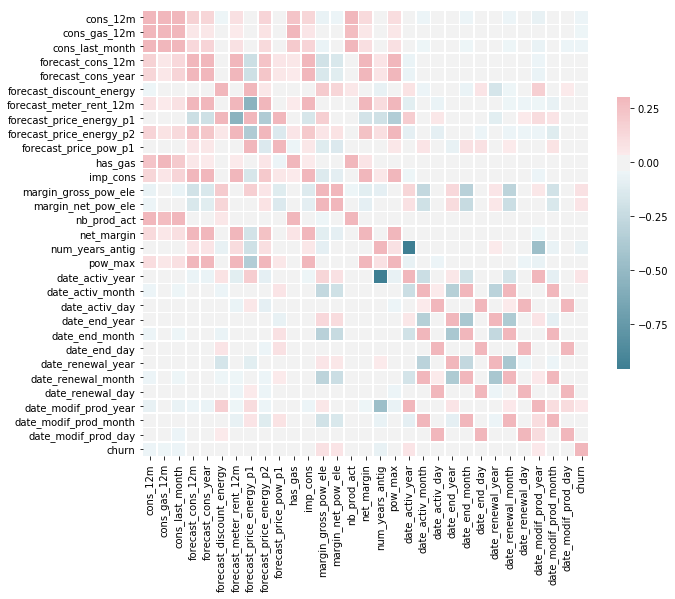

In [66]:
### correlation heatmap

plt.figure(figsize=(10,10))
corr = df1.corr()
mask = np.zeros_like(corr, dtype=np.bool)

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [67]:
df1.corr()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,date_end_year,date_end_month,date_end_day,date_renewal_year,date_renewal_month,date_renewal_day,date_modif_prod_year,date_modif_prod_month,date_modif_prod_day,churn
cons_12m,1.000000,0.477361,0.917428,0.166022,0.139565,-0.043176,0.089812,-0.034438,0.147845,-0.023727,...,-0.009331,-0.050323,-0.014747,0.005213,-0.047292,-0.011604,-0.071371,-0.038565,-0.038053,-0.051590
cons_gas_12m,0.477361,1.000000,0.449811,0.058296,0.056503,-0.013331,0.040846,-0.022285,0.076456,-0.026969,...,0.015534,-0.010941,-0.010424,0.016078,-0.011240,-0.007240,-0.029324,-0.018128,-0.028767,-0.040832
cons_last_month,0.917428,0.449811,1.000000,0.129460,0.151420,-0.037131,0.079341,-0.025083,0.123167,-0.019231,...,-0.004682,-0.043495,-0.015356,0.007705,-0.041561,-0.010851,-0.064186,-0.038740,-0.044417,-0.046464
forecast_cons_12m,0.166022,0.058296,0.129460,1.000000,0.745286,0.012976,0.390971,-0.213989,0.240848,0.060746,...,-0.007626,-0.028114,-0.013385,-0.026403,-0.014293,-0.016822,-0.052529,-0.002197,-0.002853,0.006797
forecast_cons_year,0.139565,0.056503,0.151420,0.745286,1.000000,-0.009511,0.329822,-0.203926,0.222131,0.055866,...,-0.001860,-0.034581,-0.006728,-0.006717,-0.027134,-0.004754,-0.055892,-0.030014,-0.008917,0.002163
forecast_discount_energy,-0.043176,-0.013331,-0.037131,0.012976,-0.009511,1.000000,-0.021619,0.316157,0.049823,0.023138,...,-0.008221,-0.055712,0.071532,-0.169325,-0.039180,0.026640,0.184360,0.012251,0.041787,0.011367
forecast_meter_rent_12m,0.089812,0.040846,0.079341,0.390971,0.329822,-0.021619,1.000000,-0.555220,0.631837,0.012768,...,-0.014649,-0.011487,-0.013270,0.028396,-0.040212,-0.044608,-0.043598,-0.077548,-0.013310,0.031428
forecast_price_energy_p1,-0.034438,-0.022285,-0.025083,-0.213989,-0.203926,0.316157,-0.555220,1.000000,-0.363606,0.390461,...,-0.019676,-0.001777,0.031888,-0.098576,0.017702,0.038393,0.114245,0.073164,0.009116,-0.005487
forecast_price_energy_p2,0.147845,0.076456,0.123167,0.240848,0.222131,0.049823,0.631837,-0.363606,1.000000,-0.135752,...,-0.023375,-0.033029,-0.046874,-0.015854,-0.044545,-0.045528,-0.048200,-0.120961,-0.033559,0.027374
forecast_price_pow_p1,-0.023727,-0.026969,-0.019231,0.060746,0.055866,0.023138,0.012768,0.390461,-0.135752,1.000000,...,-0.069844,0.082170,0.084447,-0.012715,0.038581,-0.011683,0.018386,0.075602,0.000433,0.003815


# Creating X and y variables

In [68]:
df_dum = df1.drop(['id'],axis=1)

In [69]:
### spliting into train and test set. fitting into linear regression model
X = df_dum.drop(['churn'], axis=1)
Y = df_dum['churn']


In [70]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.2,random_state=5)

#  K-Fold CV

In [73]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, Y_train, Y_test = X.iloc[train_index], X.iloc[test_index], Y.iloc[train_index], Y.iloc[test_index]

Train Index:  [    1     2     4 ... 15496 15497 15499] 

Test Index:  [    0     3     8 ... 15485 15490 15498]
Train Index:  [    0     1     2 ... 15497 15498 15499] 

Test Index:  [   10    17    23 ... 15469 15481 15494]
Train Index:  [    0     1     2 ... 15496 15497 15498] 

Test Index:  [   12    20    26 ... 15493 15495 15499]
Train Index:  [    0     1     3 ... 15497 15498 15499] 

Test Index:  [    2     6     7 ... 15489 15491 15496]
Train Index:  [    0     2     3 ... 15496 15498 15499] 

Test Index:  [    1     4     5 ... 15480 15483 15497]


In [74]:
count=0
c=0
for i in Y_train:
    if(i==0):
        count+=1
    else:
        c+=1
print('No. of 0:',count,'\n','No. 0f 1:', c)

No. of 0: 11197 
 No. 0f 1: 1203


In [75]:
#X_train = X
#Y_train = y
X_t = df2.drop(['id', 'churn'], axis=1)

# Feature Scaling

In [76]:
sc = StandardScaler()

std_scale = sc.fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)
X_t = std_scale.transform(X_t)

In [77]:
#X_test.head()

# LogisticRegression

In [94]:
### model fitting using logistic regression

lm = LogisticRegression(max_iter=10000)
fitted = lm.fit(X_train, Y_train)
pred = lm.predict(X_test)
scores = round(lm.score(X_test,Y_test)* 100, 2)
print("Logistic Regression score is.:" + str(lm.score(X_test,Y_test)))
print(classification_report(Y_test,pred))

Logistic Regression score is.:0.8903225806451613
             precision    recall  f1-score   support

        0.0       0.89      1.00      0.94      2760
        1.0       0.00      0.00      0.00       340

avg / total       0.79      0.89      0.84      3100



# Support vector machine Classifier

In [95]:
### model fitting with SVC

svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train, Y_train)
svc_pred = svc.predict(X_test)
svc_scores = round(svc.score(X_test,Y_test)* 100, 2)
print("SVC Regression scores is..:" + str(svc.score(X_test,Y_test)))
print(classification_report(Y_test,svc_pred))

SVC Regression scores is..:0.89
             precision    recall  f1-score   support

        0.0       0.89      1.00      0.94      2760
        1.0       0.00      0.00      0.00       340

avg / total       0.79      0.89      0.84      3100



# Linear Support vector machine classifier

In [96]:
### model fitting using SVM svc

svm = LinearSVC(max_iter=10000)
svm_fitted = svm.fit(X_train, Y_train)
svm_pred = svm.predict(X_test)
svm_scores = round(svm.score(X_test,Y_test)* 100, 2)
print("SVM Regression scores is..:" + str(svm.score(X_test,Y_test)))
print(classification_report(Y_test,svm_pred))

SVM Regression scores is..:0.8903225806451613
             precision    recall  f1-score   support

        0.0       0.89      1.00      0.94      2760
        1.0       0.00      0.00      0.00       340

avg / total       0.79      0.89      0.84      3100



# KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier(n_neighbors =4)
knn.fit(X_train, Y_train)
Y_predknn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(" KNeighborsClassifier scores is..:" + str(acc_knn))
print(classification_report(Y_test,Y_predknn))

 KNeighborsClassifier scores is..:90.97
             precision    recall  f1-score   support

        0.0       0.89      1.00      0.94      2760
        1.0       0.55      0.04      0.07       340

avg / total       0.86      0.89      0.85      3100



# Gaussian Naive Byes

In [82]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_predG = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(" Gaussian Naive Bayes scores is..:" + str(acc_gaussian))
print(classification_report(Y_test,Y_predG))

 Gaussian Naive Bayes scores is..:56.25
             precision    recall  f1-score   support

        0.0       0.92      0.57      0.71      2760
        1.0       0.15      0.62      0.24       340

avg / total       0.84      0.58      0.66      3100



# Perceptron

In [83]:
perceptron = Perceptron(max_iter=10000)
perceptron.fit(X_train, Y_train)
Y_predP = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(" Perceptron scores is..:" + str(acc_perceptron))
print(classification_report(Y_test,Y_predP))

 Perceptron scores is..:83.81
             precision    recall  f1-score   support

        0.0       0.89      0.91      0.90      2760
        1.0       0.11      0.09      0.10       340

avg / total       0.80      0.82      0.81      3100



# stochastic gradient descent

In [84]:
sgd = SGDClassifier(max_iter=10000)
sgd.fit(X_train, Y_train)
Y_predsgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print(" Stochastic Gradient Descent scores is..:" + str(acc_sgd))
print(classification_report(Y_test,Y_predsgd))

 Stochastic Gradient Descent scores is..:90.3
             precision    recall  f1-score   support

        0.0       0.89      1.00      0.94      2760
        1.0       0.00      0.00      0.00       340

avg / total       0.79      0.89      0.84      3100



# Decision tree

In [85]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_preddt = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(" decision_tree scores is..:" + str(acc_decision_tree))
print(classification_report(Y_test,Y_preddt))

 decision_tree scores is..:100.0
             precision    recall  f1-score   support

        0.0       0.91      0.90      0.91      2760
        1.0       0.26      0.28      0.27       340

avg / total       0.84      0.84      0.84      3100



# Random Forest

In [86]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_predrf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(" random_forest scores is..:" + str(acc_random_forest))
print(classification_report(Y_test,Y_predrf))

 random_forest scores is..:99.99
             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95      2760
        1.0       0.79      0.09      0.16       340

avg / total       0.89      0.90      0.86      3100



# AdaBoostClassifier

In [87]:
from sklearn  import ensemble
adaboost =ensemble.AdaBoostClassifier()
adaboost.fit(X_train, Y_train)
Y_preda = adaboost.predict(X_test)
adaboost = round(adaboost.score(X_train, Y_train) * 100, 2)
print(" random_forest scores is..:" + str(adaboost))
print(classification_report(Y_test,Y_preda))

 random_forest scores is..:90.35
             precision    recall  f1-score   support

        0.0       0.89      1.00      0.94      2760
        1.0       0.33      0.01      0.01       340

avg / total       0.83      0.89      0.84      3100



#  DecisionTreeClassifier for Prediction

 This machine learning alogorithm makes prediction of SAMPLE_OUTPUT

In [88]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_predd = decision_tree.predict(X_t)
churn_prob = decision_tree.predict_proba(X_t)
for i, enum in enumerate(Y_predd[:6]):
    print(i, enum)

0 0.0
1 1.0
2 0.0
3 0.0
4 0.0
5 0.0


# Model Comparision

In [168]:
models = pd.DataFrame({
    'Model': ['SVM', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'SGD', 'Linear SVC', 
              'Decision Tree', 'Adaboost'],
    'Score': [svm_scores, acc_knn, scores, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, svm_scores, acc_decision_tree, adaboost]})
m = models.sort_values(by='Score', ascending=False)
m.reset_index(drop=True)

,Model,Score
0,Decision Tree,100.00
1,Random Forest,99.99
2,KNN,90.97
3,Adaboost,90.35
4,SGD,90.30
5,SVM,89.03
6,Logistic Regression,89.03
7,Linear SVC,89.03
8,Perceptron,83.81
9,Naive Bayes,56.25


In [169]:
mod = []
soc = []
for i in m['Model']:
    mod.append(i)
for i in m['Score']:
    soc.append(i)
print(mod)
print(soc)

['Decision Tree', 'Random Forest', 'KNN', 'Adaboost', 'SGD', 'SVM', 'Logistic Regression', 'Linear SVC', 'Perceptron', 'Naive Bayes']
[100.0, 99.99, 90.97, 90.35, 90.3, 89.03, 89.03, 89.03, 83.81, 56.25]


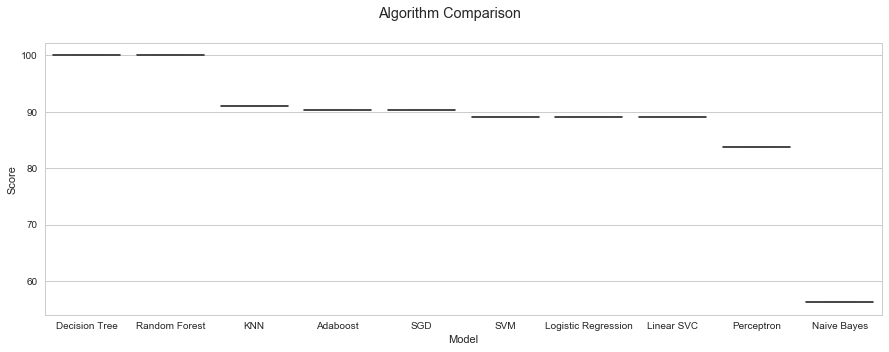

In [178]:
# boxplot algorithm comparison
sns.set(style="whitegrid")
fig = plt.figure(figsize=(15,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(x='Model',y='Score', data=m)
ax.set_xticklabels(mod)
plt.show()

# Make dataframe & Submisson Result 

In [89]:
prediction_df = pd.DataFrame(df2['id'], columns=['id', 'churn'])
prediction_df['churn'] = churn_prob[:,1]
prediction_df.to_csv('submission.csv', index=False)

In [90]:
prediction_df.head()

,id,churn
0,0004351ebdd665e6ee664792efc4fd13,0.0
1,0013f326a839a2f6ad87a1859952d227,1.0
2,002dc7935f7b6f855aaa3d1bd242ab9a,0.0
3,003fb333060c256bff67d8d550bff1fa,0.0
4,00ccb1f5828d8ed38e8be755e092eb9a,0.0
